<a href="https://colab.research.google.com/github/Siriyakon-Saenpor/229351_Statistical-Learning-for-Data-Science-1/blob/main/Copy_of_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [5]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

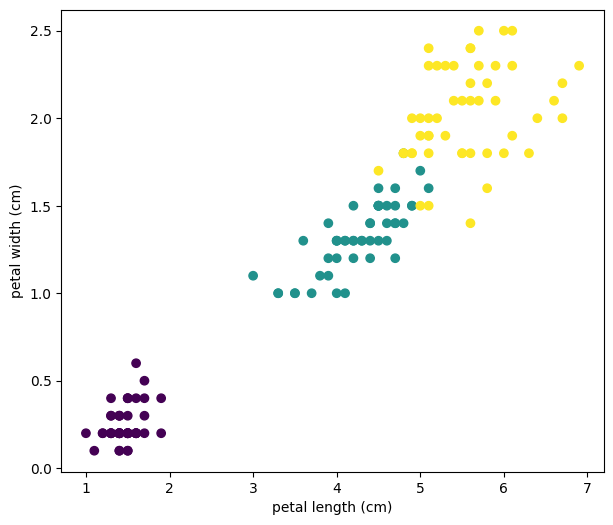

In [6]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [8]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [9]:
#TODO
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

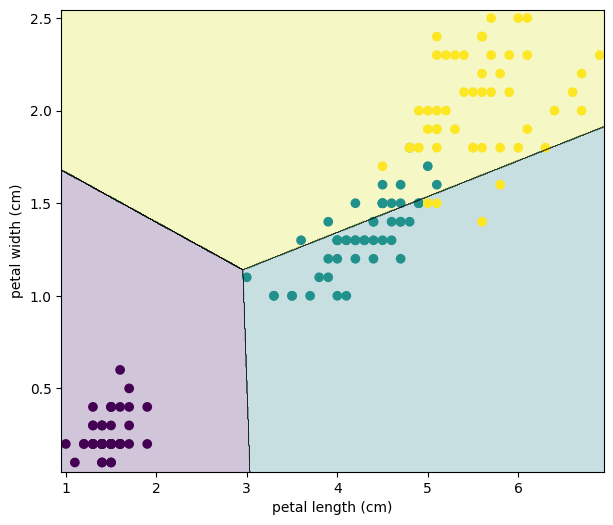

In [12]:
linsvm = LinearSVC(C=0.1)

linsvm.fit(X_train, y_train)

plot_decision_boundary(linsvm, X, y)

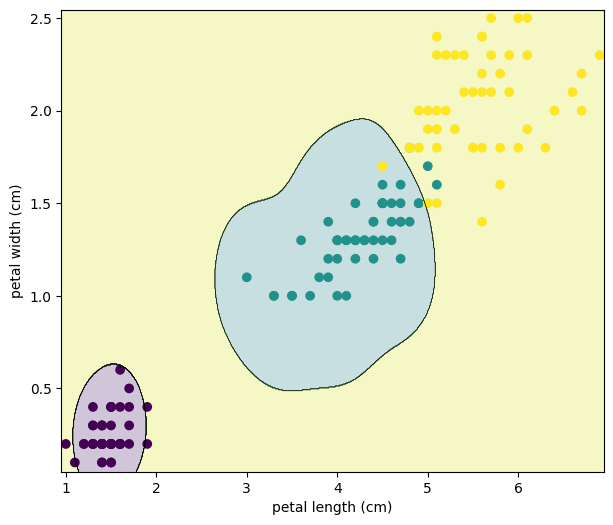

In [17]:
from math import gamma
svm = SVC(C=0.1, kernel='rbf', gamma=10)

svm.fit(X_train, y_train)

plot_decision_boundary(svm, X, y)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

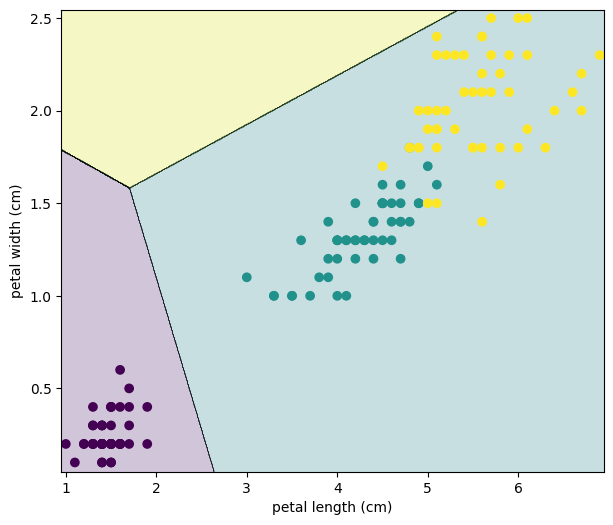

In [19]:
linsvm001 = LinearSVC(C=0.01, loss='hinge', max_iter=100000)
linsvm001.fit(X_train, y_train)
plot_decision_boundary(linsvm001, X, y)

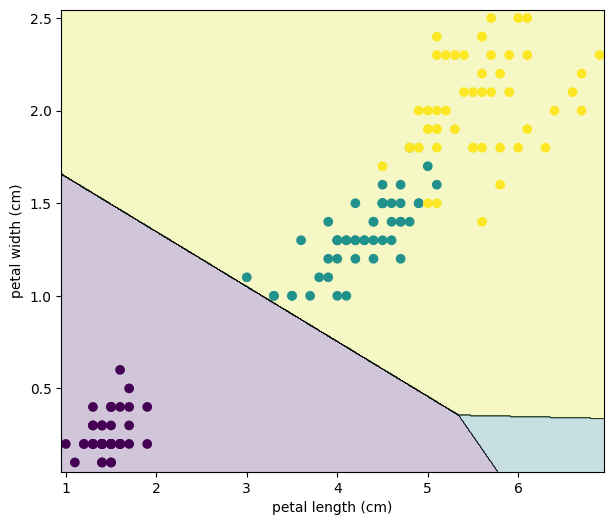

In [20]:
linsvm01 = LinearSVC(C=0.1, loss='hinge', max_iter=100000)
linsvm01.fit(X_train, y_train)
plot_decision_boundary(linsvm01, X, y)

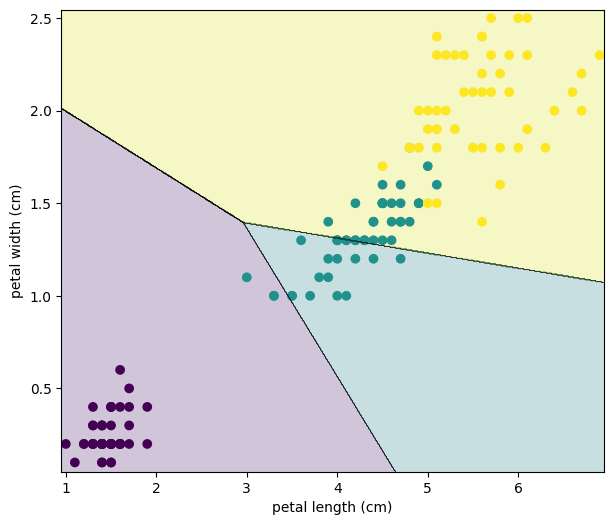

In [21]:
linsvm1 = LinearSVC(C=1.0, loss='hinge', max_iter=100000)
linsvm1.fit(X_train, y_train)
plot_decision_boundary(linsvm1, X, y)

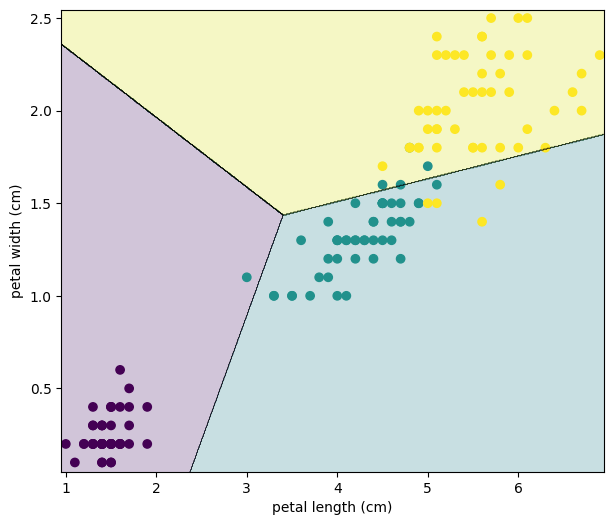

In [23]:
linsvm10 = LinearSVC(C=10.0, loss='hinge', max_iter=100000)
linsvm10.fit(X_train, y_train)
plot_decision_boundary(linsvm10, X, y)

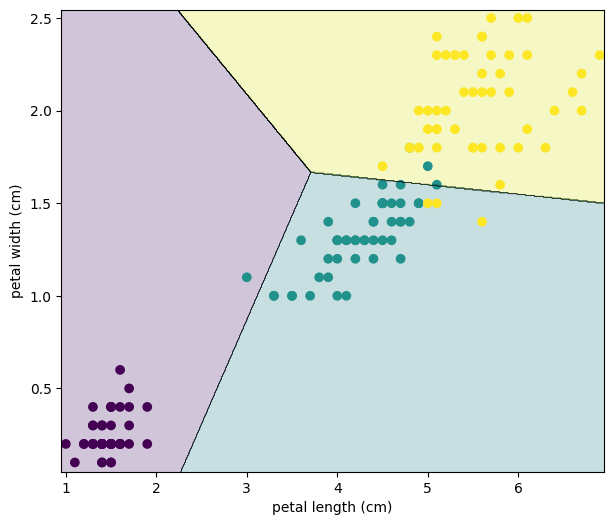

In [24]:
linsvm100 = LinearSVC(C=100.0, loss='hinge', max_iter=100000)
linsvm100.fit(X_train, y_train)
plot_decision_boundary(linsvm100, X, y)

อธิบายค่า C\
ค่า C มาก => Hard Margin จะพยายามแบ่งข้อมูลให้แม่นยำที่สุดแต่อาจทำให้\
ค่า C น้อย => soft Margin จะยอมให้ข้อมูลหลุดไปใน Margin ได้

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [26]:
from sklearn.metrics import accuracy_score
y_pred = linsvm10.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - accuracy
print('accuracy : ', accuracy)
print('test_error : ', test_error)

accuracy :  0.9555555555555556
test_error :  0.0444444444444444


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

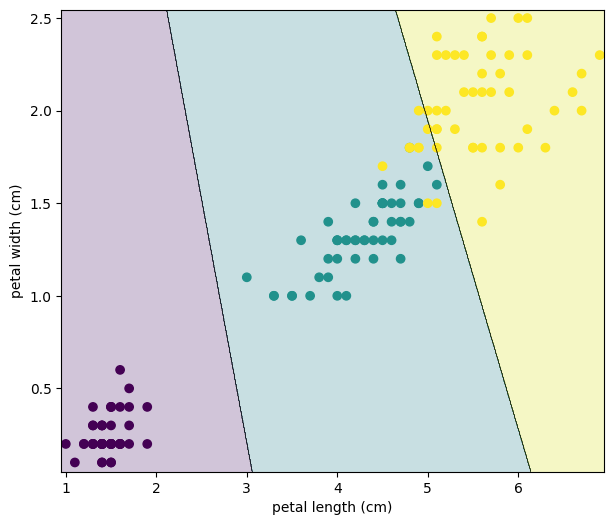

In [28]:
from math import gamma
svm001 = SVC(C=1.0, kernel='rbf', gamma=0.01, max_iter=100000)
svm001.fit(X_train, y_train)
plot_decision_boundary(svm001, X, y)

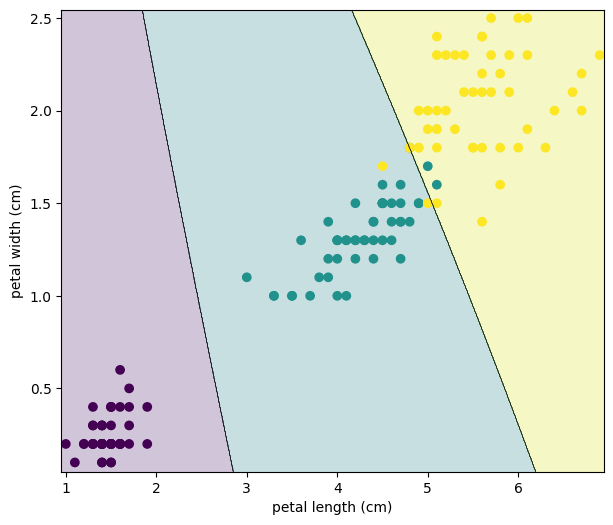

In [29]:
svm01 = SVC(C=1.0, kernel='rbf', gamma=0.1, max_iter=100000)
svm01.fit(X_train, y_train)
plot_decision_boundary(svm01, X, y)

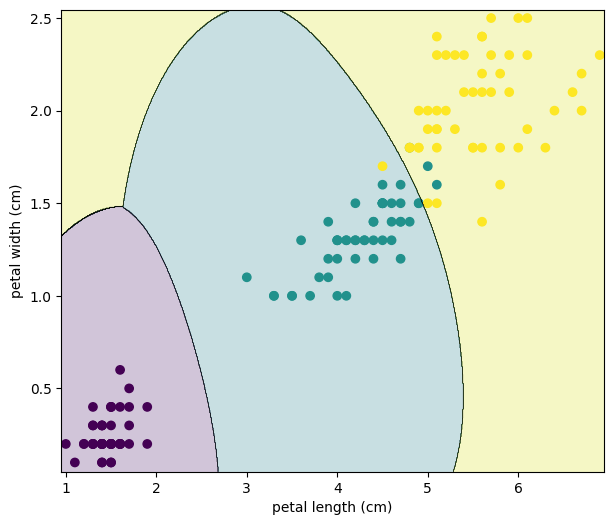

In [30]:
svm1 = SVC(C=1.0, kernel='rbf', gamma=1.0, max_iter=100000)
svm1.fit(X_train, y_train)
plot_decision_boundary(svm1, X, y)

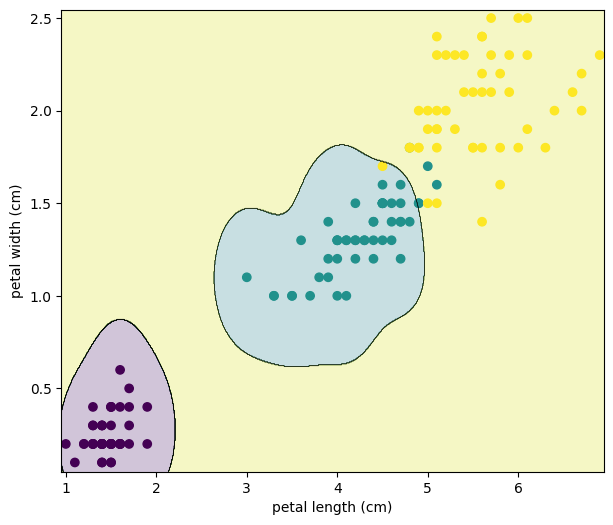

In [31]:
svm10 = SVC(C=1.0, kernel='rbf', gamma=10.0, max_iter=100000)
svm10.fit(X_train, y_train)
plot_decision_boundary(svm10, X, y)

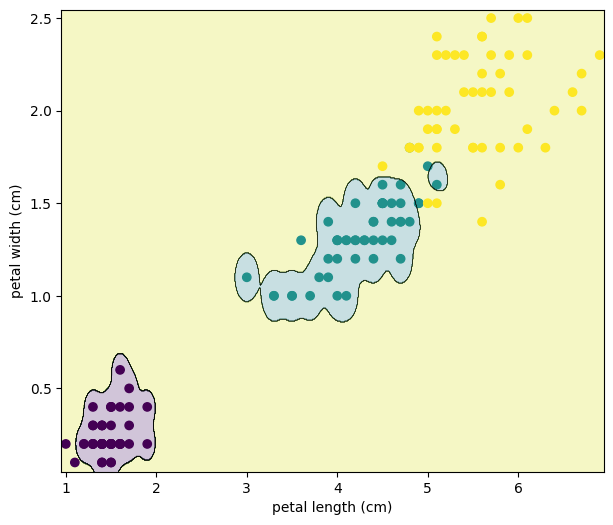

In [32]:
svm100 = SVC(C=1.0, kernel='rbf', gamma=100.0, max_iter=100000)
svm100.fit(X_train, y_train)
plot_decision_boundary(svm100, X, y)

อธิบายค่า gamma\
ค่า gamma สูง => เส้นแบ่งจะโค้งตามจุดข้อมูล\
ค่า gamma ต่ำ => เส้นแบ่งจะคลอบคลุมกว้างและเส้นตรง

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [34]:
y_pred_svm = svm1.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
test_error_svm = 1 - accuracy_svm
num_support_vectors = svm1.n_support_
print('accuracy : ', accuracy_svm)
print('test_error : ', test_error_svm)
print('num_support_vectors : ', num_support_vectors)

accuracy :  0.9777777777777777
test_error :  0.022222222222222254
num_support_vectors :  [ 4 11 12]


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. ค่า accuracy ของ Linear SVM คือ 0.956, ค่า accuracy ของ Kernel SVM คือ 0.978 ซึ่ง Kernel SVM มากกว่า Linear SVM ดังนั้น Kernel SVM สามารถแบ่งข้อมูลได้แม่นยำกว่ากว่า\
2. จากการแบ่งเส้นของ Linear SVM จะมีความเรียบตรงไม่ซับซ้อน ส่วน Kernel SVM จะเห็นได้ว่าเมื่อค่า gamma ยิ่งมากขึ้นถึงค่าที่เหมาะสม เส้นแบ่งโค้งตามจุดข้อมูล ดังนั้น Kernel SVM สามารถแบ่งข้อมูลได้แม่นยำกว่ากว่า